# LIU baseline emittance parameters

few calculations on the accuracy expected for the LIU case after LS2. BCMS beams.

Beam parameters from https://edms.cern.ch/ui/file/1296306/2/LIU-table-protons_v3.pdf

Errors on the beam parameters estimated from Matt for the LIU management https://indico.cern.ch/event/735908/contributions/3035371/s

In [1]:
# LIU goals and current achievement
ACHIEVED = {"I":8.05e11/8., "emit":1.2e-6, "emil":0.9, "dpp":0.8e-3}
BCMS = {"I":16.25e11/8., "emit":1.43e-6, "emil":1.48, "dpp":1.1e-3}

# Machine settings
betar = 0.915095

In [2]:
import uncertainties as un
import numpy as np
from uncertainties import unumpy #need for arrays ?

import matplotlib.pyplot as plt
%matplotlib inline

def fastErrorbar(x, y):
    '''
    Do a plot with errorbars using the uncertainties arrays as input
    '''
    xx = unumpy.nominal_values(x)
    sx = unumpy.std_devs(x)
    yy = unumpy.nominal_values(y)
    sy = unumpy.std_devs(y)
    plt.errorbar(xx,yy,xerr=sx, yerr=sy, fmt='o')

In [16]:
# INSTRUMENTAL UNCERTAINTIES, PERCENTAGE
# LONGITUDINAL 
s_emil = 0.1 # 10%
s_dpp = 0.0 # 5%

# TRANSVERSE
s_sigma = 0.1
s_emit = 0.1 # the target !

# OPTICAL STUFF
s_beta = 0.0
s_D = 0.02

# RELATIVISTIC PARAMETERS
s_betar = 0.00 # --> it makes sense not to have an error on this, as the same value is used always. A wrong value would affect the precision, but not the accuracy !

In [17]:
# cast all with errors
BCMS_w_err = {"emit": un.ufloat(BCMS['emit'], s_emit*BCMS['emit'] ), "emil":un.ufloat(BCMS['emil'], s_emil*BCMS['emil'] ), "dpp":un.ufloat(BCMS['dpp'], s_dpp*BCMS['dpp'] )}
ACHIEVED_w_err = {"emit": un.ufloat(ACHIEVED['emit'], s_emit*ACHIEVED['emit'] ), "emil":un.ufloat(ACHIEVED['emil'], s_emil*ACHIEVED['emil'] ), "dpp":un.ufloat(ACHIEVED['dpp'], s_dpp*ACHIEVED['dpp'] )}
RELATIVISTIC = {"betar": un.ufloat(betar, betar*s_betar)}

# from MADx Injection7 model
betax_65H = 21.78; betay_65H = 11.97; D_65H = 3.24
betax_68H = 13.57; betay_68H = 21.01; D_68H = 2.38
betax_64V = 12.19; betay_64V = 22.39; D_64V = 2.46
betax_85V = 23.14; betay_85V = 11.48; D_85V = 3.11
OPTICS_65H = {"betax": un.ufloat(betax_65H, betax_65H*s_beta), "betay": np.nan, "D": un.ufloat(D_65H, D_65H*s_D)} # the high beta wirescanners case
OPTICS_68H = {"betax": un.ufloat(betax_68H, betax_68H*s_beta), "betay": np.nan, "D": un.ufloat(D_68H, D_68H*s_D)} # the high beta wirescanners case
OPTICS_64V = {"betax": np.nan, "betay": un.ufloat(betay_64V, betay_64V*s_beta), "D": np.nan} # the high beta wirescanners case
OPTICS_85V = {"betax": np.nan, "betay": un.ufloat(betay_85V, betay_85V*s_beta), "D": np.nan} # the high beta wirescanners case

In [18]:
def emi_norm(sigma, D, dpp, beta, betar=0.915095):
    '''
    Computes the normalised emittance using the traditional deconvolution
    '''
    gammar = 1./ ((1-betar**2)**0.5)
    return ((sigma**2 - (D*dpp)**2)/beta ) * betar * gammar

# Linear error approach validation

In [19]:
def emi_norm_y(sigma, beta, betar=0.915095):
    '''
    Computes the normalised emittance using the traditional deconvolution
    '''
    return emi_norm(sigma, 0., 0., beta)

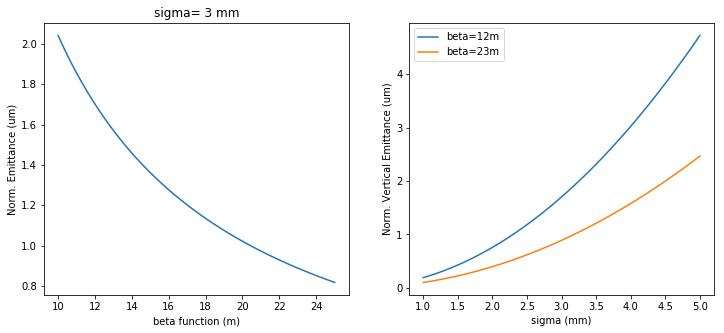

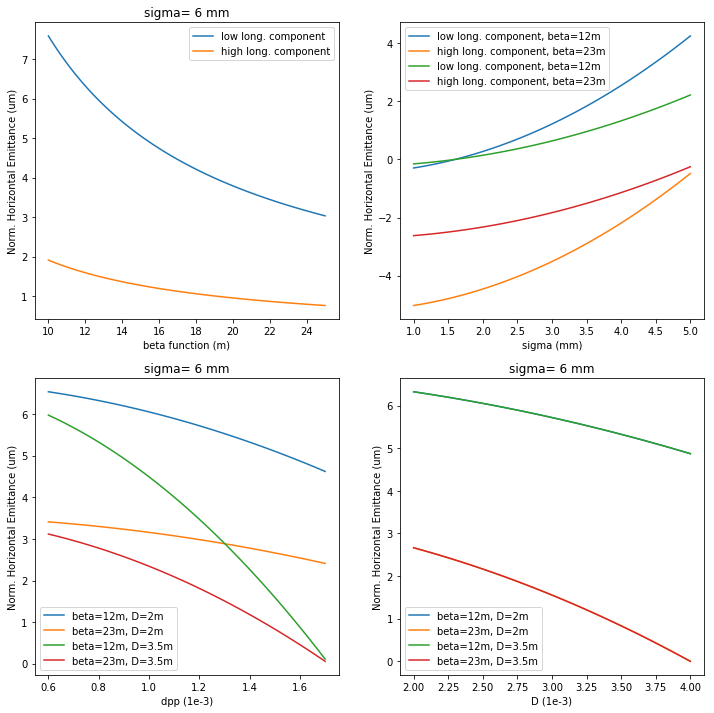

In [20]:
bet_span = np.linspace(10,25,100)
sigma_span = np.linspace(1e-3, 5e-3, 100)
fig, ax = plt.subplots(1,2,figsize=(12,5))
ax[0].plot(bet_span, 1e6*emi_norm_y(3e-3, bet_span))
ax[0].set_xlabel('beta function (m)')
ax[0].set_ylabel('Norm. Emittance (um)')
ax[0].set_title('sigma= 3 mm')
ax[1].plot(1e3*sigma_span, 1e6*emi_norm_y(sigma_span, 12), label='beta=12m')
ax[1].plot(1e3*sigma_span, 1e6*emi_norm_y(sigma_span, 23), label='beta=23m')
ax[1].set_xlabel('sigma (mm)')
ax[1].set_ylabel('Norm. Vertical Emittance (um)')
ax[1].legend(frameon=True)

D_span = np.linspace(2, 4, 100)
dpp_span = np.linspace(0.6e-3, 1.7e-3, 100)
fig, ax = plt.subplots(2,2,figsize=(12,12))
ax[0,0].plot(bet_span, 1e6*emi_norm(6e-3, 2, 0.8e-3,bet_span),label='low long. component')
ax[0,0].plot(bet_span, 1e6*emi_norm(6e-3, 3.5, 1.5e-3,bet_span),label='high long. component')
ax[0,0].set_xlabel('beta function (m)')
ax[0,0].set_ylabel('Norm. Horizontal Emittance (um)')
ax[0,0].set_title('sigma= 6 mm')
ax[0,0].legend(frameon=True)
ax[0,1].plot(1e3*sigma_span, 1e6*emi_norm(sigma_span, 2, 0.8e-3,12),label='low long. component, beta=12m')
ax[0,1].plot(1e3*sigma_span, 1e6*emi_norm(sigma_span, 3.5, 1.5e-3,12),label='high long. component, beta=23m')
ax[0,1].plot(1e3*sigma_span, 1e6*emi_norm(sigma_span, 2, 0.8e-3,23),label='low long. component, beta=12m')
ax[0,1].plot(1e3*sigma_span, 1e6*emi_norm(sigma_span, 3.5, 1.5e-3,23),label='high long. component, beta=23m')
ax[0,1].set_xlabel('sigma (mm)')
ax[0,1].set_ylabel('Norm. Horizontal Emittance (um)')
ax[0,1].legend(frameon=True)
ax[1,0].plot(dpp_span*1e3, 1e6*emi_norm(6e-3, 2, dpp_span,12),label='beta=12m, D=2m')
ax[1,0].plot(dpp_span*1e3, 1e6*emi_norm(6e-3, 2, dpp_span,23),label='beta=23m, D=2m')
ax[1,0].plot(dpp_span*1e3, 1e6*emi_norm(6e-3, 3.5, dpp_span,12),label='beta=12m, D=3.5m')
ax[1,0].plot(dpp_span*1e3, 1e6*emi_norm(6e-3, 3.5, dpp_span,23),label='beta=23m, D=3.5m')
ax[1,0].set_xlabel('dpp (1e-3)')
ax[1,0].set_ylabel('Norm. Horizontal Emittance (um)')
ax[1,0].set_title('sigma= 6 mm')
ax[1,0].legend(frameon=True)
ax[1,1].plot(D_span, 1e6*emi_norm(6e-3, D_span, 0.8e-3,12),label='beta=12m, D=2m')
ax[1,1].plot(D_span, 1e6*emi_norm(6e-3, D_span, 1.5e-3,23),label='beta=23m, D=2m')
ax[1,1].plot(D_span, 1e6*emi_norm(6e-3, D_span, 0.8e-3,12),label='beta=12m, D=3.5m')
ax[1,1].plot(D_span, 1e6*emi_norm(6e-3, D_span, 1.5e-3,23),label='beta=23m, D=3.5m')
ax[1,1].set_xlabel('D (1e-3)')
ax[1,1].set_ylabel('Norm. Horizontal Emittance (um)')
ax[1,1].set_title('sigma= 6 mm')
ax[1,1].legend(frameon=True)

... ok so a non linear approach to errors could be beneficial 

# Let's start with the vertical wirescanners

No dispersion and longitudinal stuff looks easier ...

Briefly:
$$
\sigma = \sqrt{\beta \epsilon}
$$

it means that the profile size is
$$
\epsilon = \frac{\beta_r \gamma_r}{\beta} \sigma^2
$$

so the accuracy comes from the profile, beta function, and relativistic parameteres


## 1) Which sigma is expected in vertical from the LIU and achieved parameters
- High beta wirescanner

In [21]:
def sigmaFromEmin(emin, D, dpp, beta, betar=0.915095):
    gammar = 1./ np.sqrt(1-betar**2)
    return ((beta*emin/betar/gammar)+(D*dpp)**2)**0.5

print('Achieved sigma at BWS64V = '+str(1e3*sigmaFromEmin(ACHIEVED['emit'], 0., ACHIEVED['dpp'], un.nominal_value(OPTICS_64V['betay'])))+' mm')
print('LIU param sigma at BWS64V = '+str(1e3*sigmaFromEmin(BCMS['emit'], 0., BCMS['dpp'], un.nominal_value(OPTICS_64V['betay'])))+' mm')

Achieved sigma at BWS64V = 3.44084790311 mm
LIU param sigma at BWS64V = 3.75614951757 mm


- Low beta wirescanner

In [22]:
print('Achieved sigma at BWS85V = '+str(1e3*sigmaFromEmin(ACHIEVED['emit'], 0., ACHIEVED['dpp'], un.nominal_value(OPTICS_85V['betay'])))+' mm')
print('LIU param sigma at BWS85V = '+str(1e3*sigmaFromEmin(BCMS['emit'], 0., BCMS['dpp'], un.nominal_value(OPTICS_85V['betay'])))+' mm')

Achieved sigma at BWS85V = 2.46382225085 mm
LIU param sigma at BWS85V = 2.68959425686 mm


## 2) Now let's assume we have an error on the optical function, what is the minimum allowed accuracy of the wirescanner ? 

- High beta wirescanner

In [23]:
def dummyCalc(emi):
    '''
    Get the calculations with error and returns percentages and useful stuff
    '''
    ret0 = 100* un.std_dev(emi) / un.nominal_value(emi) # error percentage
    return ret0 

sigma_achiev = 3.44084790311e-3
sigma_LIU = 3.75614951757e-3

# s_sigma = 0.02
# sigma_achiev = un.ufloat(sigma_achiev, s_sigma*sigma_achiev)
# sigma_LIU = un.ufloat(sigma_LIU, s_sigma*sigma_LIU)

emiach = emi_norm(sigma_achiev, 0., 0., OPTICS_64V['betay'],betar=RELATIVISTIC['betar'])
emiLIU = emi_norm(sigma_LIU, 0., 0., OPTICS_64V['betay'],betar=RELATIVISTIC['betar'])

print('Accuracy on the beta function = '+str(100*s_beta)+' %')
print('Emittance at BWS64V (ACHIEVED) = \t'+str(1e6*emiach)+'   -->   is the '+str(dummyCalc(emiach))+' %') 
print('Emittance at BWS64V (LIU) = \t\t'+str(1e6*emiLIU)+'   -->   is the '+str(dummyCalc(emiLIU))+' %')  
print('Error from optical functions errors only')

Accuracy on the beta function = 0.0 %
Emittance at BWS64V (ACHIEVED) = 	1.2+/-0   -->   is the 0.0 %
Emittance at BWS64V (LIU) = 		1.43+/-0   -->   is the 0.0 %
Error from optical functions errors only


- Low beta wirescanner

In [24]:
sigma_achiev = 2.46382225085e-3
sigma_LIU = 2.68959425686e-3

# sigma_achiev = un.ufloat(sigma_achiev, s_sigma*sigma_achiev)
# sigma_LIU = un.ufloat(sigma_LIU, s_sigma*sigma_LIU)

emiach = emi_norm(sigma_achiev, 0., 0., OPTICS_85V['betay'],betar=RELATIVISTIC['betar'])
emiLIU = emi_norm(sigma_LIU, 0., 0., OPTICS_85V['betay'],betar=RELATIVISTIC['betar'])

print('Accuracy on the beta function = '+str(100*s_beta)+' %')
print('Emittance at BWS64V (ACHIEVED) = \t'+str(1e6*emiach)+'   -->   is the '+str(dummyCalc(emiach))+' %') 
print('Emittance at BWS64V (LIU) = \t\t'+str(1e6*emiLIU)+'   -->   is the '+str(dummyCalc(emiLIU))+' %')  
print('Error from optical functions errors only')

Accuracy on the beta function = 0.0 %
Emittance at BWS64V (ACHIEVED) = 	1.2+/-0   -->   is the 0.0 %
Emittance at BWS64V (LIU) = 		1.43+/-0   -->   is the 0.0 %
Error from optical functions errors only


# Now the horizontal wirescanners

Same story but even more complicated:
$$
\sigma = \sqrt{\beta \epsilon + D^2\delta^2}
$$

it means that the profile size is
$$
\epsilon = \frac{\beta_r \gamma_r}{\beta} (\sigma^2 - D^2\delta^2)
$$

so the accuracy comes from the profile, beta function, and relativistic parameteres, but also from the $\delta$ measurement and the Dispersion


## 1) Which sigma is expected in vertical from the LIU and achieved parameters
- High beta wirescanner

In [25]:
print('Achieved sigma at BWS64V = '+str(1e3*sigmaFromEmin(ACHIEVED['emit'], un.nominal_value(OPTICS_65H['D']), ACHIEVED['dpp'], un.nominal_value(OPTICS_65H['betax'])))+' mm')
print('LIU param sigma at BWS64V = '+str(1e3*sigmaFromEmin(BCMS['emit'], un.nominal_value(OPTICS_65H['D']), BCMS['dpp'], un.nominal_value(OPTICS_65H['betax'])))+' mm')

Achieved sigma at BWS64V = 4.27028583676 mm
LIU param sigma at BWS64V = 5.14065896331 mm


- Low beta wirescanner

In [26]:
print('Achieved sigma at BWS85V = '+str(1e3*sigmaFromEmin(ACHIEVED['emit'], un.nominal_value(OPTICS_68H['D']), ACHIEVED['dpp'], un.nominal_value(OPTICS_68H['betax'])))+' mm')
print('LIU param sigma at BWS85V = '+str(1e3*sigmaFromEmin(BCMS['emit'], un.nominal_value(OPTICS_68H['D']), BCMS['dpp'], un.nominal_value(OPTICS_68H['betax'])))+' mm')

Achieved sigma at BWS85V = 3.28645568351 mm
LIU param sigma at BWS85V = 3.9248971316 mm


## 2) Same, let's plug all the errors and see what margin we have for the wirescanner

- High beta wirescanner 

In [30]:
ACHIEVED_w_err

{'dpp': 0.0008+/-0,
 'emil': 0.9+/-0.09000000000000001,
 'emit': 1.2e-06+/-1.2e-07}

In [31]:
OPTICS_65H

{'D': 3.24+/-0.06480000000000001, 'betax': 21.78+/-0, 'betay': nan}

In [29]:
sigma_achiev = 4.27028583676e-3
sigma_LIU = 5.14065896331e-3

# s_sigma = 0.02
# sigma_achiev = un.ufloat(sigma_achiev, s_sigma*sigma_achiev)
# sigma_LIU = un.ufloat(sigma_LIU, s_sigma*sigma_LIU)

emiach = emi_norm(sigma_achiev, OPTICS_65H['D'], ACHIEVED_w_err['dpp'], OPTICS_65H['betax'],betar=RELATIVISTIC['betar'])
emiLIU = emi_norm(sigma_LIU, OPTICS_65H['D'], BCMS_w_err['dpp'], OPTICS_65H['betax'],betar=RELATIVISTIC['betar'])

print('Accuracy on the beta function = '+str(100*s_beta)+' %')
print('Emittance at BWS64V (ACHIEVED) = \t'+str(1e6*emiach)+'   -->   is the '+str(dummyCalc(emiach))+' %') 
print('Emittance at BWS64V (LIU) = \t\t'+str(1e6*emiLIU)+'   -->   is the '+str(dummyCalc(emiLIU))+' %')  
print('Error from optical functions errors only')

Accuracy on the beta function = 0.0 %
Emittance at BWS64V (ACHIEVED) = 	1.200+/-0.028   -->   is the 2.33343255313 %
Emittance at BWS64V (LIU) = 		1.43+/-0.05   -->   is the 3.70208049295 %
Error from optical functions errors only


- Low beta wirescanner

In [28]:
sigma_achiev = 3.28645568351e-3
sigma_LIU = 3.9248971316e-3

# s_sigma = 0.05
# sigma_achiev = un.ufloat(sigma_achiev, s_sigma*sigma_achiev)
# sigma_LIU = un.ufloat(sigma_LIU, s_sigma*sigma_LIU)

emiach = emi_norm(sigma_achiev, OPTICS_68H['D'], ACHIEVED_w_err['dpp'], OPTICS_68H['betax'],betar=RELATIVISTIC['betar'])
emiLIU = emi_norm(sigma_LIU, OPTICS_68H['D'], BCMS_w_err['dpp'], OPTICS_68H['betax'],betar=RELATIVISTIC['betar'])

print('Accuracy on the beta function = '+str(100*s_beta)+' %')
print('Emittance at BWS64V (ACHIEVED) = \t'+str(1e6*emiach)+'   -->   is the '+str(dummyCalc(emiach))+' %') 
print('Emittance at BWS64V (LIU) = \t\t'+str(1e6*emiLIU)+'   -->   is the '+str(dummyCalc(emiLIU))+' %')  
print('Error from optical functions errors only')

Accuracy on the beta function = 0.0 %
Emittance at BWS64V (ACHIEVED) = 	1.200+/-0.024   -->   is the 2.02086440202 %
Emittance at BWS64V (LIU) = 		1.43+/-0.05   -->   is the 3.20617909934 %
Error from optical functions errors only


# Summary

- The emittance function is not linear, so a **non-linear error propagation might be beneficial** if we estimate that the errors are big (relatively to the change)
- On the profile side, **the sigma** between the achieved situation and the LIU baseline **is increasing**
    * ~10% increase in vertical, 3.44 to 3.75 mm on high beta BWS and 2.46 to 2.68 on low beta BWS
    * ~20% increase in horizontal, 4.27 to 5.14 mm on high beta BWS and 3.28 to 3.92 mm on low beta BWS
- The measurement of the **relativistic parameters** is **very critical**. In fact a 1% error on the beta propagates to a 5% error on gamma. The two are correlated though ... need to check if the coveriance calculation is behaving properly !
    * That's not true ! In fact we use **constant values, so this affects the precision, but not the accuracy**, as the rms of the betar and gammar is zero !

# Open points

- How do we measure the **relativistic parameters** ? Does it make sense to use zero error on these ?
- Beam wire scanners **calibration error** ? What's the error on **sigma** ?

## Appendix1: manual check of the errors for uncorrelated variables

In [238]:
# def emi_norm(sigma, D, dpp, beta, betar=0.915095):
#     '''
#     Computes the normalised emittance using the traditional deconvolution
#     '''
#     gammar = 1./ ((1-betar**2)**0.5)
#     return ((sigma**2 - (D*dpp)**2)/beta ) * betar * gammar

def sigma_emi_norm(sigma, D, dpp, beta, betar=0.915095):
    '''
    Computes the error on the normalised emittance without covariance.
    Input the variables as uncertainties objects
    '''
    #get the numbers
    sigma = un.nominal_value(sigma)
    s_sigma = un.std_dev(sigma)
    D = un.nominal_value(D)
    s_D =un.std_dev(D)
    delta = un.nominal_value(dpp)
    s_delta = un.std_dev(dpp)
    beta = un.nominal_value(beta)
    s_beta = un.std_dev(beta)
    #calculate gamma
    gammar = 1./ ((1-betar**2)**0.5)   
    #derivatives
    D_D = -2*betar*gammar*(delta**2)*D/beta
    D_beta = -betar*gammar*(sigma**2 - (D*delta)**2)/(beta**2)
    D_delta = -2*betar*gammar*delta*(D**2)/beta
    D_sigma = 2*betar*gammar*sigma/beta
    #let's go
    s_emi = ( (D_beta*s_beta)**2 + (D_sigma*s_sigma)**2 + (D_D*s_D)**2 + (D_delta*s_dpp)**2  )**0.5
    return s_emi

In [255]:
sigma_achiev = 4.27028583676e-3
sigma_LIU = 5.14065896331e-3

# s_sigma = 0.05
# sigma_achiev = un.ufloat(sigma_achiev, s_sigma*sigma_achiev)
# sigma_LIU = un.ufloat(sigma_LIU, s_sigma*sigma_LIU)

emiach = emi_norm(sigma_achiev, OPTICS_65H['D'], ACHIEVED_w_err['dpp'], OPTICS_65H['betax'],betar=RELATIVISTIC['betar'])
emiLIU = emi_norm(sigma_LIU, OPTICS_65H['D'], BCMS_w_err['dpp'], OPTICS_65H['betax'],betar=RELATIVISTIC['betar'])

print('Accuracy on the beta function = '+str(100*s_beta)+' %')
print('Emittance at BWS64V (ACHIEVED) = \t'+str(1e6*emiach)+'   -->   is the '+str(dummyCalc(emiach))+' %') 
print('Emittance at BWS64V (LIU) = \t\t'+str(1e6*emiLIU)+'   -->   is the '+str(dummyCalc(emiLIU))+' %')  
print('Error from optical functions errors only')
print('---')
sigma_achiev = 4.27028583676e-3
sigma_LIU = 5.14065896331e-3
s_sigma = 0.00
sigma_achiev = un.ufloat(sigma_achiev, s_sigma*sigma_achiev)
sigma_LIU = un.ufloat(sigma_LIU, s_sigma*sigma_LIU)

1e6*sigma_emi_norm(sigma_achiev, OPTICS_65H['D'], ACHIEVED_w_err['dpp'], OPTICS_65H['betax'])

Accuracy on the beta function = 1.0 %
Emittance at BWS64V (ACHIEVED) = 	1.20+/-0.07   -->   is the 6.03256981891 %
Emittance at BWS64V (LIU) = 		1.43+/-0.14   -->   is the 9.49131707647 %
Error from optical functions errors only
---


87.50372074254079

## Appendix2: cross-corelation check

In [289]:
betar = 0.915095
sig_betar = betar*0.01
print("Manual way: betar="+str(betar) +" pm "+str( sig_betar))

# traditional way
def gamma(beta):
    return 1./((1-beta**2)**0.5)
def gamma_err(beta, s_beta):
    return beta * (gamma(beta)**3) * s_beta

gammar = gamma(betar)
s_gammar = gamma_err(betar, sig_betar)
print("Manual way: gamma="+str(gammar) +" pm "+str(s_gammar))

betar_u = un.ufloat(betar, sig_betar)
print("Using the class: betar="+str(betar_u))
gammar_u = gamma(betar_u)
print("Using the class: gamma="+str(gammar_u))
# e fin qui tutto bene ...

Manual way: betar=0.915095 pm 0.00915095
Manual way: gamma=2.47992305234 pm 0.12771649215
Using the class: betar=0.915+/-0.009
Using the class: gamma=2.48+/-0.13


In [294]:
# now a derived quantity of both
def betagamma(beta, gamma):
    return beta*gamma

np.cov(betar, gammar)

#OFC not defined because we have only two values .... 
# for the moment, assumed without error 

/cvmfs/sft.cern.ch/lcg/views/LCG_93/x86_64-slc6-gcc62-opt/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: Degrees of freedom <= 0 for slice


array([[ nan,  nan],
       [ nan,  nan]])